# ICA: Visualizing independent components

You can either visualize
1. Independent Components (ICs) as Parcel Weights/Loadings
2. Task Contrast Contributions

In [19]:
import numpy as np
import os

# Function to load ICA components for a given subject number
def load_ica_components(subject_number):
    file_path = f'/home/hmueller2/ibc_code/ibc_output_ICA/5_components/sub-{subject_number}_ica_components.npy'
    if os.path.exists(file_path):
        return np.load(file_path)
    else:
        print(f"File not found: {file_path}")
        return None

# Example usage for subject number 01
subject_number = '15'
ica_components = load_ica_components(subject_number)
print(ica_components.shape)

(116, 5)


## 1. ICs of Task Contrast

### 1.1 Bar Plots (Parcel Weights)

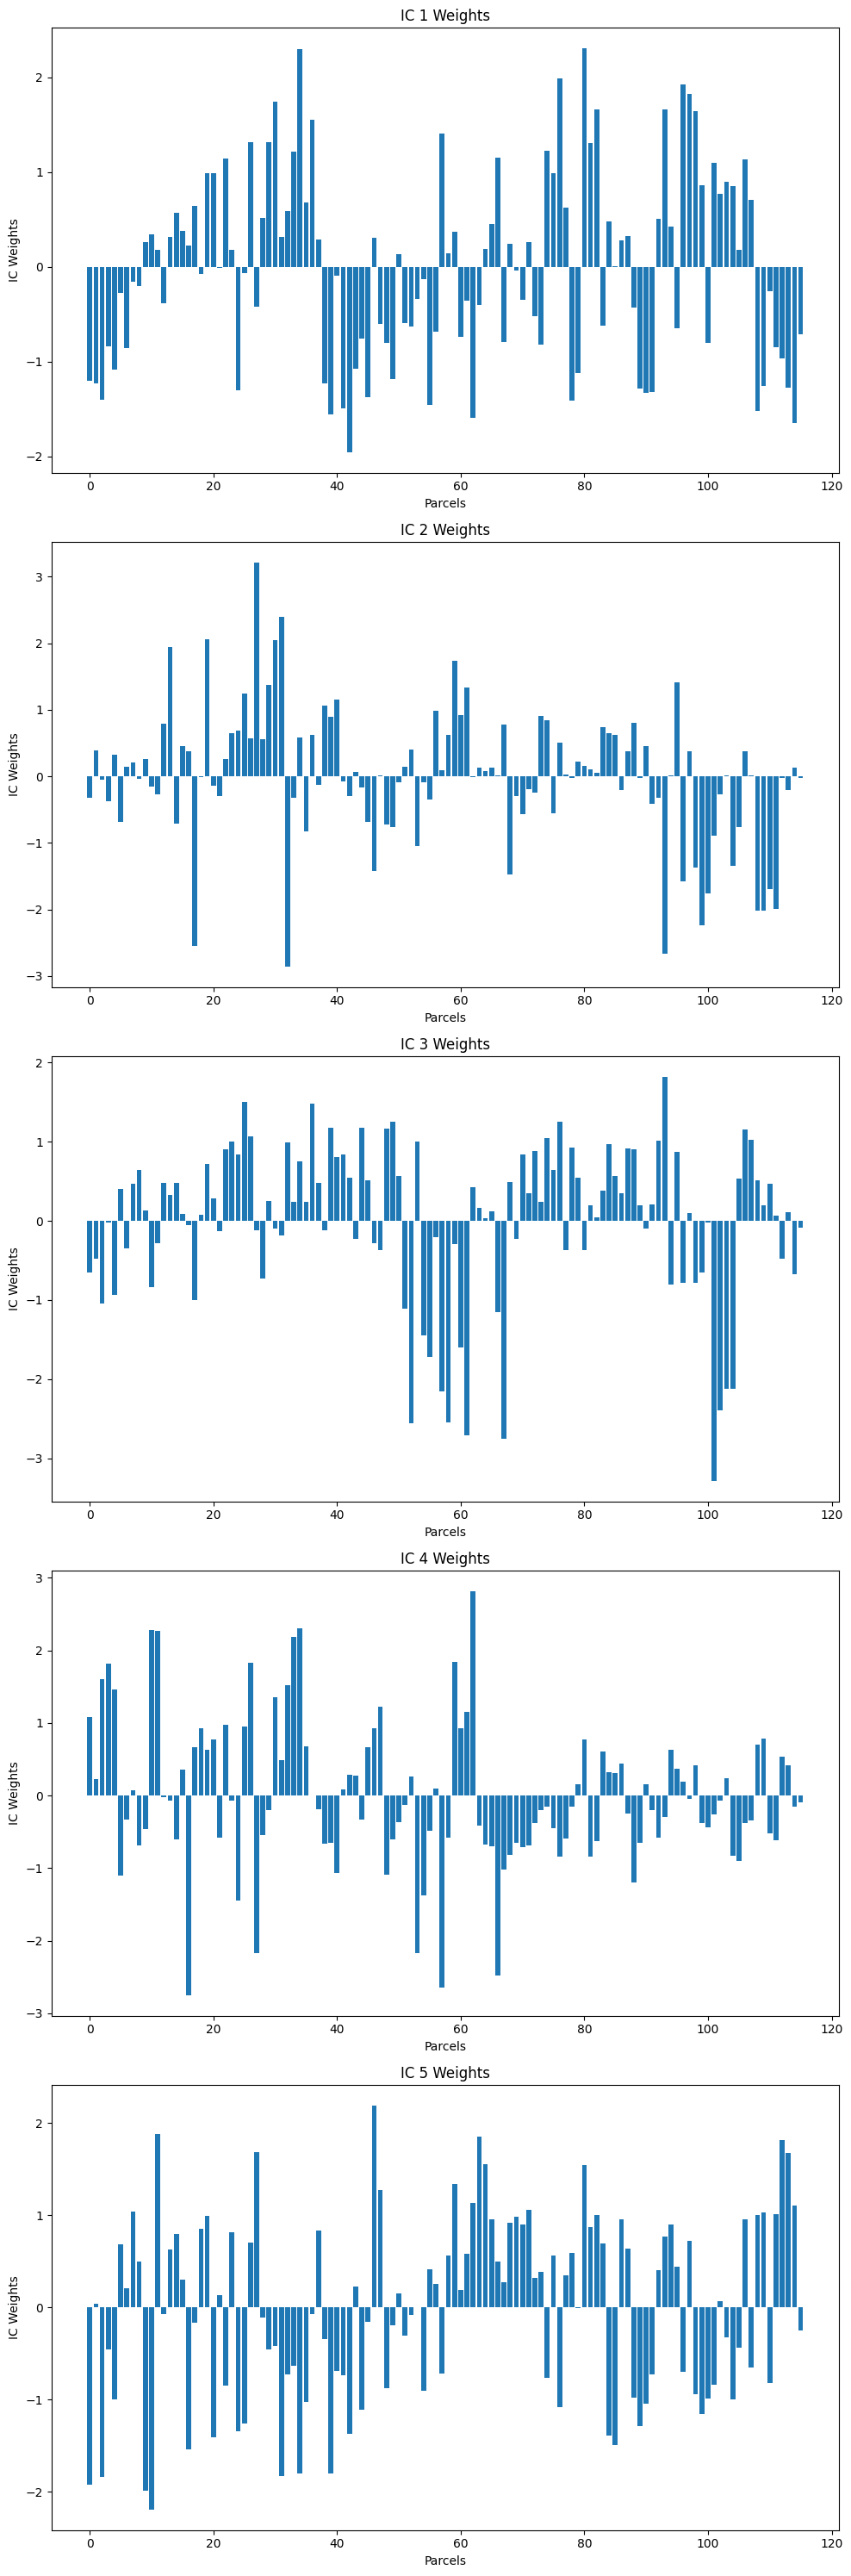

In [20]:
import matplotlib.pyplot as plt

# Number of components
num_components = ica_components.shape[1]

# Create subplots
fig, axes = plt.subplots(num_components, 1, figsize=(10, 6 * num_components))

for i in range(num_components):
    ic_weights = ica_components[:, i]
    axes[i].bar(range(len(ic_weights)), ic_weights)
    axes[i].set_xlabel('Parcels')
    axes[i].set_ylabel('IC Weights')
    axes[i].set_title(f'IC {i + 1} Weights')

plt.tight_layout()
plt.show()

### 1.2 Heatmaps (IC Matrix)

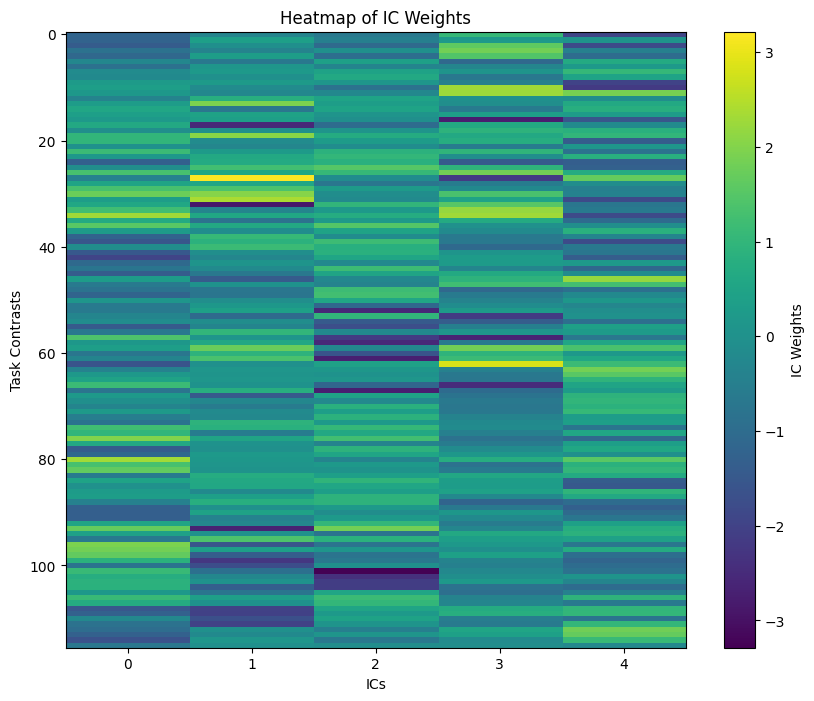

In [21]:
plt.figure(figsize=(10, 8))
plt.imshow(ica_components, aspect='auto', cmap='viridis')
plt.colorbar(label='IC Weights')
plt.xlabel('ICs')
plt.ylabel('Task Contrasts')
plt.title('Heatmap of IC Weights')
plt.show()

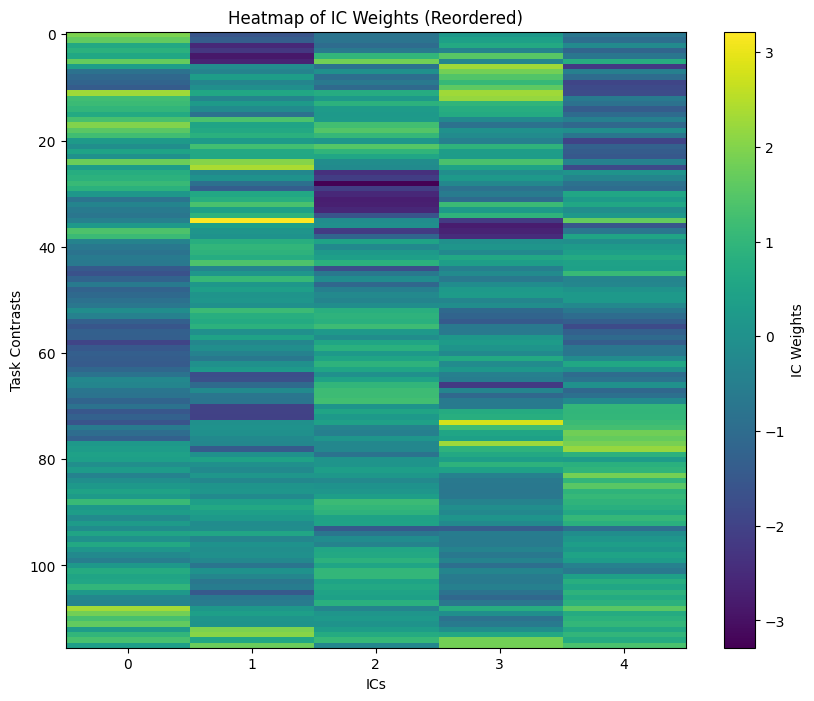

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

# Perform hierarchical clustering
Z = linkage(ica_components, method='ward')

# Get the order of the leaves
leaf_order = leaves_list(Z)

# Reorder the ica_components matrix
ica_components_reordered = ica_components[leaf_order, :]

# Plot the heatmap with reordered parcels
plt.figure(figsize=(10, 8))
plt.imshow(ica_components_reordered, aspect='auto', cmap='viridis')
plt.colorbar(label='IC Weights')
plt.xlabel('ICs')
plt.ylabel('Task Contrasts')
plt.title('Heatmap of IC Weights (Reordered)')
plt.show()

### 1.3 Parcel Weight Maps (Brain Surface)

## First reduced verices, Second reduced contrasts

In [5]:
import numpy as np
import os

subject = 'sub-15'

# Load the ICA components and reduced task contrasts
ica_components_vertices = np.load(f'/home/hmueller2/ibc_code/ibc_output_ICA_vertices/3_components/{subject}_ica_components.npy')
reduced_task_contrasts = np.load(f'/home/hmueller2/ibc_code/ibc_output_ICA_vertices/3_components/{subject}_reduced_task_contrasts.npy')

print(ica_components_vertices.shape)
print(reduced_task_contrasts.shape)

(238, 3)
(238, 3)
